In [1]:
# Data ---> Business Problem --> EDA --> Insights/Trends/Patterns/Observations --> Business Decisions
# Pre-requisite: Basic Python + Pandas + Numpy

## Steps for EDA
- Importing necessary libraries
- Data Loading
- Data Understanding
- Missing Value Check
- Missing Value Imputation
- Segmentation (Optional)
- Univariate Analysis (One Variable at a time - Check the distribution of the column)
- Bivariate Analysis (Two Variable at a time - Relationship between the two columns)
- Multivariate Analysis (More than two variables at a time - Relationship between more than two columns)

## Importing Necessary Library

In [2]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# !pip install --user matplotlib
# !pip install --user seaborn

## Data Loading

In [4]:
df=pd.read_csv("titanic_dataset.csv")
#https://drive.google.com/file/d/1plN-KWVopblsqOdgTYPn-O-zG5cWrkf7/view?usp=drive_link

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#PassengerId: Unique id for every passenger like a primary key
#Survived: Whether a passenger survived or not
#Pclass: Passenger Class basically class of travel
#Name: Name of the passenger
#Sex: Gender of the passenger
#Age: Age of the passenger
#SibSp: (Siblings + Spouse) Count of Siblings and Spouse along with passenger is travelling
#Parch: (Parent + Children) Count of Parent and Children along with passenger is travelling
#Ticket: Ticket id 
#Fare: Fare paid by passenger for travel (in $s)
#Cabin: Cabin no. or room no. allocated
#Embarked: Boarding Station

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Value Check

In [10]:
# Percentage of missing values
# Identification of Missing values
100*df.isnull().sum()/len(df)
#100*df.isnull().sum()/df.shape[0]
#100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
# Missing Values Column --> Age(~20%), Cabin(~77%), Embarked(~0.22%)
# Strategy: 
# (a) Columns having high percentage of missing values (>40% or 50%), directly discard that column from the analysis.
# (b) Columns having missing values under acceptable range we prefer to impute them (replace with some values)
# (c) For numerical columns we prefer to use mean or median.(Median is preferred)
# (d) Median is not affected with the outliers. (Extreme values)
# (e) For categorical columns we prefer to use mode.

In [11]:
## Cabin column has more than 40% of missing values so straight away dropping it
df1=df.drop("Cabin",axis=1)
# axis =1 as we are dropping the column (axis=0 if you want to drop row)

In [12]:
100*df1.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [13]:
df1.shape

(891, 11)

In [15]:
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med)
# Fillna function will replace/impute all missing values of age column with median value i.e. 28

In [16]:
100*df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [18]:
arr=np.array([1,2,3,4,5])
print("Mean:",np.mean(arr))
print("Median:",np.median(arr))

Mean: 3.0
Median: 3.0


In [19]:
arr=np.array([1,2,3,4,100])
print("Mean:",np.mean(arr))
print("Median:",np.median(arr))

Mean: 22.0
Median: 3.0


In [24]:
mod=df1["Embarked"].mode()[0]
df1["Embarked"]=df1["Embarked"].fillna(mod)
# Fillna function will replace/impute all missing values of Embarked column with mode value i.e. 'S'

In [25]:
100*df1.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Segmentation (Optional)

In [26]:
df1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [27]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [28]:
num_cols=["Age","Fare"]
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
extra_cols=["PassengerId","Name","Ticket"]

## Univariate Analysis

### Numerical

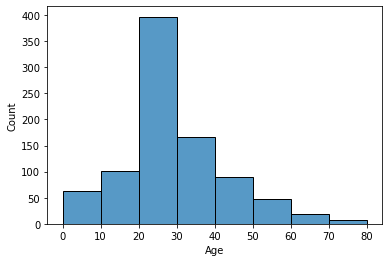

In [35]:
sns.histplot(x=df1["Age"],bins=[0,10,20,30,40,50,60,70,80])# range(0,90,10) # bins=5
plt.show()

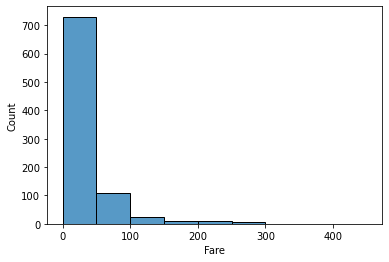

In [32]:
sns.histplot(x=df1["Fare"],bins=range(0,500,50))
plt.show()

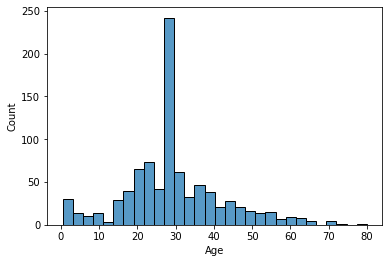

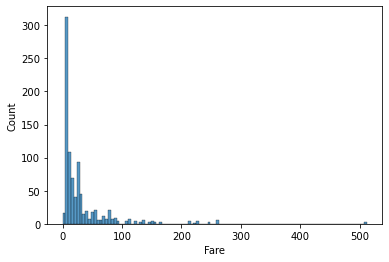

In [33]:
for col in num_cols:
    sns.histplot(x=df1[col])
    plt.show()

In [37]:
df1["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

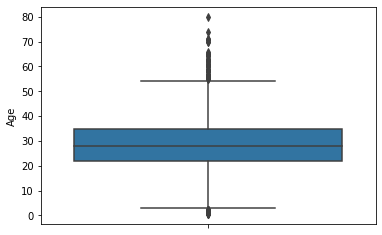

In [38]:
sns.boxplot(y=df1["Age"])
plt.show()
# Quartile = Quarter + Percentile
# Q1= First Quartile (25th Percentile) --> (Left/bottom side of the box)
# Q2= Second Quartile (50th Percentile) --> (Middle line of the box) (Median)
# Q3= Third Quartile (75th Percentile) --> (Right/top side of the box)
# Two Whiskers: (Emperical Relationships)
# Lower Whisker: Q1-1.5*(Q3-Q1) #22-1.5(35-22)
# Upper Whisker: Q3+1.5*(Q3-Q1) #22+1.5(35-22)
# Blackdots: Outliers (Extreme Values)
# IQR : Inter Quartile Range( Q3-Q1)

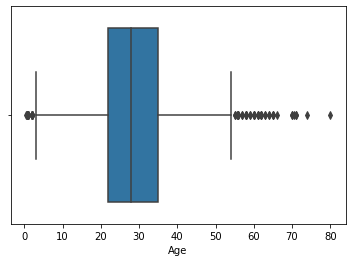

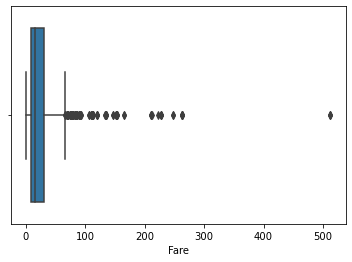

In [39]:
for col in num_cols:
    sns.boxplot(x=df1[col])
    plt.show()

### Categorical

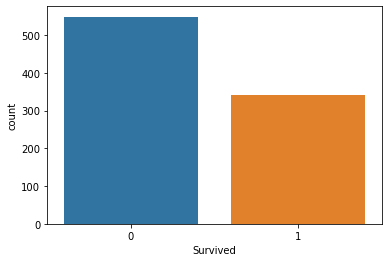

In [40]:
sns.countplot(x=df1["Survived"])
plt.show()

In [41]:
df1["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

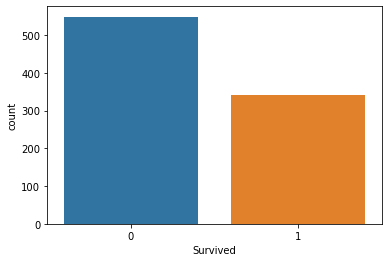

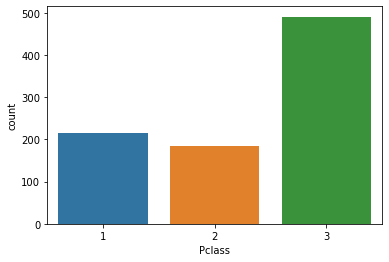

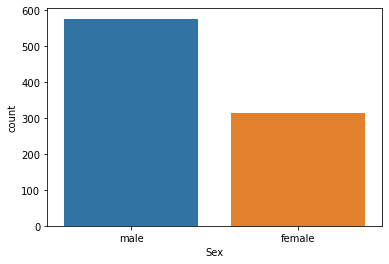

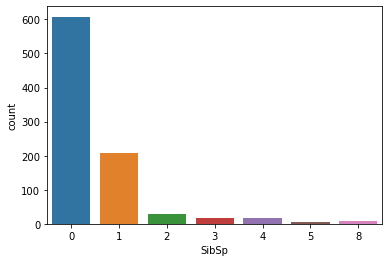

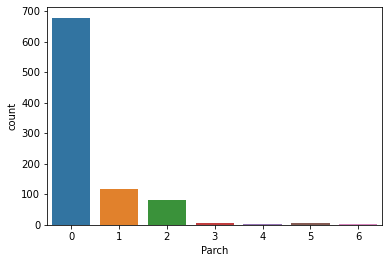

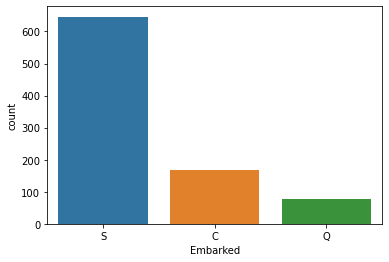

In [42]:
for col in cat_cols:
    sns.countplot(x=df1[col])
    plt.show()

## Bivariate Analysis

### Categorical Vs Numerical

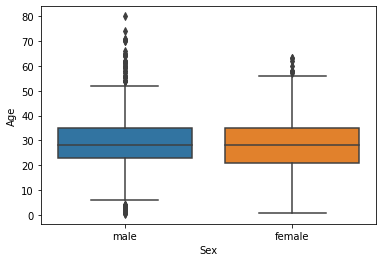

In [43]:
sns.boxplot(x=df1["Sex"],y=df1["Age"])
plt.show()

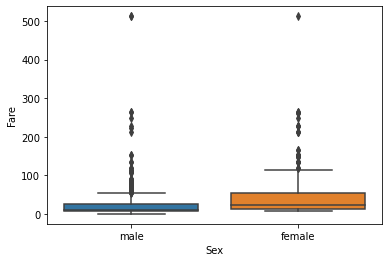

In [44]:
sns.boxplot(x=df1["Sex"],y=df1["Fare"])
plt.show()

### Numerical Vs Numerical

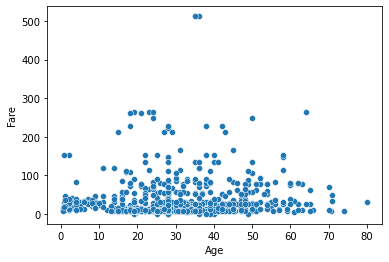

In [45]:
sns.scatterplot(x=df1["Age"],y=df1["Fare"])
plt.show()

In [46]:
# Positive Relationship: One variable increase leads to increase in another variable (Positive Corr)
# Negtive Relationship: One variable increase leads to decrease in another variable (Negative Corr)
# No Relationship: One variables seems unaffected from other variable (No Corr)

In [47]:
### Categorical Vs Categorical -- HomeWork (BarPlot)

## Multivariate Analysis

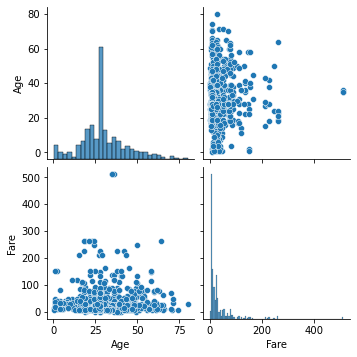

In [48]:
sns.pairplot(df1[num_cols],kind=)
plt.show()
# Histogram and scatterplots

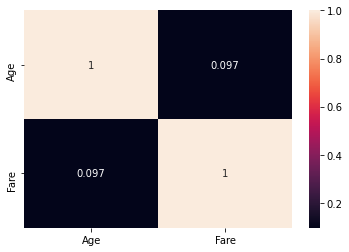

In [51]:
sns.heatmap(df1[num_cols].corr(),annot=True)
plt.show()

In [52]:
#!pip install --upgrade seaborn

In [53]:
## Correlation represents strength of relationship between variables
## Correlation lies in the range of -1 to 1
#--> Theoritcal Interpretation
## Negative correlation  (0 to -1) shows inverse relationship
## Positive correlation (0 to 1) shows direct relationship
## 0 or near by correlation represents no relationship.
#--> Industrial Interpretation
## Correlation value >0.7 --> High Positive Corrleation
## 0.3<Correlation value<0.7 --> Weak Positive Corrleation
## Correlation value <-0.7 --> High Negative Corrleation
## -0.7<Correlation value<-0.3 --> Weak Negative Corrleation
## -0.3<Correlation value<0.3 --> No or almost no Corrleation

In [ ]:
var1 --> yoe var2 --> Salary --> Corr --> 0.48
